<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4_Nuclear/blob/main/Lab4_beta_attenuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4. Radiation intensity attenuation



$$I = I_0 e^{-\mu d}$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, poisson, linregress, kstest
from sklearn.linear_model import LinearRegression
from scipy.special import kl_div

Uncertainty rounding

In [11]:
# round by meaningful digits
# with respect to error
def round_meaningful(value, error):
  if error <=0:
    # return unchanged and break
    return value, error

  # Power of error
  power_err = int(np.floor(np.log10(error)))

  # Digits of error in format a.bcd
  n_err = error / (10**np.floor(power_err))

  # keep 2-digits only for errors like 1.0, 1.1
  # otherwise round it up
  if n_err >= 1.2:
    n_err = np.ceil(n_err)
    error = n_err * 10** power_err

  error_rounded = np.round(error, -power_err)
  value_rounded = np.round(value, -power_err)

  return value_rounded, error_rounded

# Background

Background radiation was found to be Poisson distributed with intensity $I_{bg}= 0.29 \frac{1}{s}$, see [Lab 4. Poisson test.ipynb](https://github.com/evgeny-kolonsky/Lab4_Nuclear/blob/main/Lab4_Poisson_test.ipynb).

In [12]:
I_background = 0.29 # counts /s

# Sr-90

![image.png](https://radioactivity.eu.com/static/bd2ac4b2ed7ce11af31e688bfcadc8b0/d1f95/Diagramme_Strontium_En.jpg)

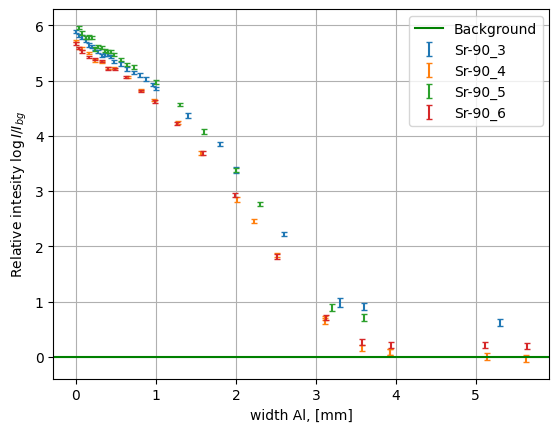

In [13]:
URL = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab4_Nuclear/2023_12_26/'
for num in [3,4,5, 6]:
  filename = f'sr-90-{num}.txt'
  data = np.genfromtxt(URL + filename)
  d, counts, time = data.T
  delta = 1/np.sqrt(counts) # relative error
  I = counts / time
  I_rel = I / I_background # relative
  I_err = delta * I_rel
  log_I_rel = I_err / I_rel # error of log

  plt.errorbar(d, np.log(I_rel), yerr=log_I_rel, linestyle='', capsize=2, label=f'Sr-90_{num}')

plt.axhline(0, color='green', label='Background')
plt.xlabel('width Al, [mm]')
plt.ylabel(r'Relative intesity $\log I/I_{bg}$')
plt.grid()
plt.legend()


# Tl-204

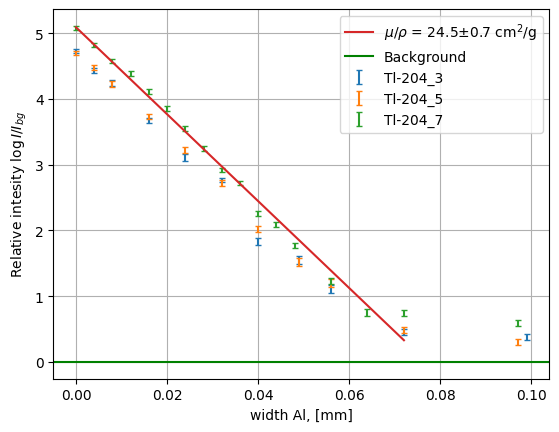

In [14]:
# station 1
# Tl-204-3
# shelf 3
# label down
URL = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab4_Nuclear/2023_12_28/'
for num in [3, 5, 7]:
  filename = f'Tl-204_{num}.txt'
  data = np.genfromtxt( filename)
  d, counts, time = data.T
  d *= 1e-1 # mm -> cm
  delta = 1/np.sqrt(counts) # relative error
  I = counts / time
  I_rel = I / I_background # relative
  I_err = delta * I_rel
  log_I_rel = I_err / I_rel # error of log

  plt.errorbar(d, np.log(I_rel), yerr=log_I_rel, linestyle='', capsize=2, label=f'Tl-204_{num}')

WIDTH = 0.08 # cm
RHO = 2.7 # g/cm3 - Aluminium
decay = d < WIDTH # exponential decay part
logI = np.log(I_rel[decay])
width = d[decay]
fit = linregress(width, logI)
mu_rho = - fit.slope / RHO
mu_rho_err = fit.stderr / RHO
# uncertainty
mu_rho, mu_rho_err = round_meaningful(mu_rho, mu_rho_err)

plt.plot(width, fit.intercept + fit.slope * width, label=fr'$\mu/\rho$ = {mu_rho:.1f}±{mu_rho_err:.1f} cm$^2$/g')


plt.axhline(0, color='green', label='Background')
plt.xlabel('width Al, [mm]')
plt.ylabel(r'Relative intesity $\log I/I_{bg}$')
plt.grid()
plt.legend()


# Cs-137

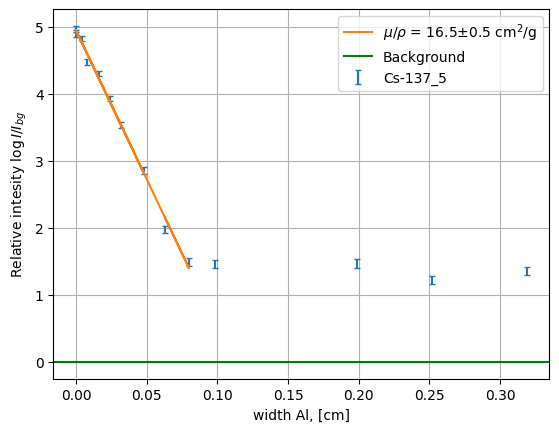

In [15]:
# station 1
# Cs-137_1
# shelf 10
# label down
URL = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab4_Nuclear/2023_12_28/'
for num in [5]:
  filename = f'Cs-137_{num}.txt'
  data = np.genfromtxt( filename)
  d, counts, time = data.T
  d *= 1e-1 # mm -> cm
  delta = 1/np.sqrt(counts) # relative error
  I = counts / time
  I_rel = I / I_background # relative
  I_err = delta * I_rel
  log_I_rel = I_err / I_rel # error of log

  plt.errorbar(d, np.log(I_rel), yerr=log_I_rel, linestyle='', capsize=2, label=f'Cs-137_{num}')

WIDTH = 0.09 # cm
RHO = 2.7 # g/cm3 - Aluminium
decay = d < WIDTH # exponential decay part
logI = np.log(I_rel[decay])
width = d[decay]
fit = linregress(width, logI)
mu_rho = - fit.slope / RHO
mu_rho_err = fit.stderr / RHO
# uncertainty
mu_rho, mu_rho_err = round_meaningful(mu_rho, mu_rho_err)

plt.plot(width, fit.intercept + fit.slope * width, label=fr'$\mu/\rho$ = {mu_rho:.1f}±{mu_rho_err:.1f} cm$^2$/g')


plt.axhline(0, color='green', label='Background')
plt.xlabel('width Al, [cm]')
plt.ylabel(r'Relative intesity $\log I/I_{bg}$')
plt.grid()

plt.legend()


# Co-60

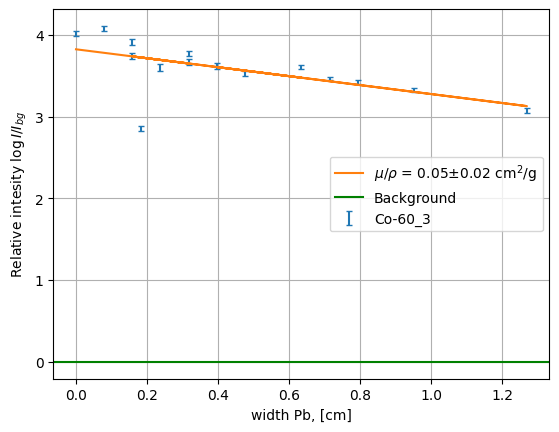

In [22]:
# station 4
# Co-60_3
# sample 2
# shelf 3
# Pb plates
URL = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab4_Nuclear/2023_12_28/'
for num in [3]:
  filename = f'Co-60_{num}.txt'
  data = np.genfromtxt( URL + filename)
  d, time, counts = data.T
  d *= 1e-4 # um -> cm
  delta = 1/np.sqrt(counts) # relative error
  I = counts / time
  I_rel = I / I_background # relative
  I_err = delta * I_rel
  log_I_rel = I_err / I_rel # error of log

  plt.errorbar(d, np.log(I_rel), yerr=log_I_rel, linestyle='', capsize=2, label=f'Co-60_{num}')

WIDTH = 1.3 # cm
RHO = 11.35 # g/cm3 - Plumbum
decay = d < WIDTH # exponential decay part
logI = np.log(I_rel[decay])
width = d[decay]
fit = linregress(width, logI)
mu_rho = - fit.slope / RHO
mu_rho_err = fit.stderr / RHO
# uncertainty
mu_rho, mu_rho_err = round_meaningful(mu_rho, mu_rho_err)

plt.plot(width, fit.intercept + fit.slope * width, label=fr'$\mu/\rho$ = {mu_rho:.2f}±{mu_rho_err:.2f} cm$^2$/g')


plt.axhline(0, color='green', label='Background')
plt.xlabel('width Pb, [cm]')
plt.ylabel(r'Relative intesity $\log I/I_{bg}$')
plt.grid()

plt.legend()


In [ ]:
WIDTH = 0.09 # cm
RHO = 2.7 # g/cm3 - Aluminium
decay = d < WIDTH # exponential decay part
logI = np.log(I_rel[decay])
width = d[decay]
fit = linregress(width, logI)
mu_rho = - fit.slope / RHO
mu_rho_err = fit.stderr / RHO
# uncertainty
mu_rho, mu_rho_err = round_meaningful(mu_rho, mu_rho_err)

plt.plot(width, fit.intercept + fit.slope * width, label=fr'$\mu/\rho$ = {mu_rho:.1f}±{mu_rho_err:.1f} cm$^2$/g')
